In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
from shapely.geometry import Point
import random

In [4]:
#load survey and create geodataframe

s = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_C_MERGE_CORRECTED.csv')

geometry = [Point(xy) for xy in zip(s.X, s.Y)]
crs = {'init': 'epsg:4326'}
gs = gpd.GeoDataFrame(s, crs=crs, geometry=geometry)

gs.head()

,Unnamed: 0,Y,X,Depth,Selection,geometry
0,0,50.759664,-1.187467,18.288,0.0,POINT (-1.1874668 50.7596635)
1,1,50.759673,-1.187468,18.211,0.0,POINT (-1.1874676 50.7596732)
2,2,50.759681,-1.187468,18.139,0.0,POINT (-1.1874683 50.7596813)
3,3,50.759687,-1.187465,18.137,0.0,POINT (-1.1874649 50.7596873)
4,4,50.759691,-1.187465,18.177,0.0,POINT (-1.1874652 50.7596914)


In [5]:
minx = gs['X'].min()
maxx = gs['X'].max()
rangex = maxx-minx


miny = gs['Y'].min()
maxy = gs['Y'].max()
rangey = maxy-miny


In [29]:
stepx = 0.007
stepy = 0.007

In [30]:
#to determine how many to iterate through
rangex/stepx

4.0501000000000085

In [31]:
rangey/stepy

2.2756714285715622

In [32]:
#create empty selection geodataframe
ss = gpd.GeoDataFrame()

In [33]:
for i in range(0,4):
    for j in range(0,3):
        XA= minx +(i*stepx)
        YA = miny + (j*stepy)
        XB = minx + ((i+1)*stepx)
        YB = miny + ((j+1)*stepy)
        
        a = s[(s['X'] > XA) & (s['X'] < XB) & (s['Y'] > YA) & (s['Y'] < YB)]
        
        minn = a['Depth'].min()
        maxx = a['Depth'].max()

        print (minn, "m was selected")
        print (maxx, "m was selected")

        places  =  gs[gs.Depth == minn].index

        if len(places)> 1:
            pred_index = random.choice(places)
        else:
            pred_index = places[0]
        
        ss = ss.append(gs.iloc[pred_index])
        
        place2  =  gs[gs.Depth == maxx].index
        
        if len(place2)> 1:
            pred_index2 = random.choice(place2)
        else:
            pred_index2 = place2[0]
        
        ss =ss.append(gs.iloc[pred_index2])

17.599 m was selected
23.322 m was selected
14.645 m was selected
20.308 m was selected
15.032 m was selected
16.676 m was selected
19.482 m was selected
24.125 m was selected
15.428 m was selected
20.972 m was selected
15.123 m was selected
17.248 m was selected
18.293 m was selected
25.283 m was selected
17.057 m was selected
22.525 m was selected
8.484 m was selected
18.977 m was selected
18.795 m was selected
25.108 m was selected
13.986 m was selected
24.859 m was selected
5.69 m was selected
18.053 m was selected


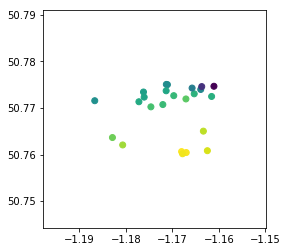

In [34]:
ss.plot(column='Depth')
plt.show()

In [35]:
len(ss)

24

In [28]:
ss.to_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_Maxmin_005.csv')
